# Answer

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from  matplotlib import pyplot as plt

C:\Users\brean\AppData\Local\Temp\ipykernel_29220\2772118602.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [86]:
df = pd.read_csv("linear_regression_test_data.csv")



In [87]:
reg = LinearRegression().fit(df["x"].to_numpy().reshape(-1,1), df["y"])


print(f"intercept (b0): {reg.intercept_}\ncoefficent (b1): {reg.coef_[0]}")



intercept (b0): 0.024525025871305117
coefficent (b1): 1.934005885001058


# Analytical Soultion

$y = B_0x+B_1$

In [5]:
df = pd.read_csv("linear_regression_test_data.csv")


In [6]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals)

In [7]:

Sxy = sum( (df["x"]-df["x"].mean()) * (df["y"]-df["y"].mean()) )
Sxx = sum( (df["x"]-df["x"].mean())**2 )

b1 = Sxy/Sxx

b0 = df["y"].mean() - b1*(df["x"].mean())

print(f"the intercept (b0): {b0}")
print(f"the coefficent (b1): {b1}")



the intercept (b0): 0.024525025871305006
the coefficent (b1): 1.9340058850010584


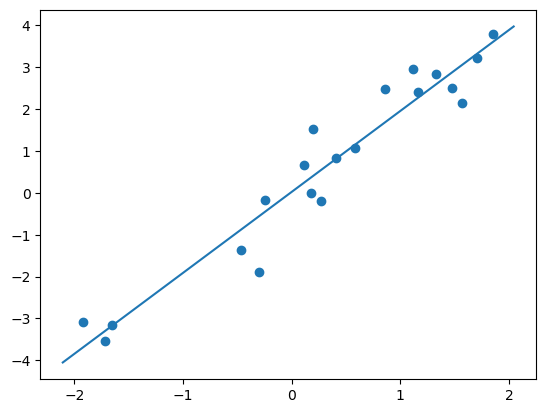

In [8]:
plt.scatter(df["x"], df["y"])
abline(slope = b1, intercept = b0)

# Numerical Solution

$B_0$ is the intercept<br>
$B_1$ is the coefficent<br>
$J(b_0,b_1) = \sum (B_0+B_1x_i - y_i)^2$

${∂J \over ∂B_0}  = 2 \sum (B_0+B_1x_i - y_i) $<br><br>
${∂J \over ∂B_1} = 2 \sum x_i(B_0+B_1x_i - y_i)$

In [9]:
vecb = {"B0": 0, "B1": 0}
LEARNING_RATE = 0.01
EPOCHS = 1000
X = df["x"]
Y = df["y"]

# def error(vecb: dict, x,y):
error = 0

for _ in range(EPOCHS):
    
    error_old = error
    error = sum([ (vecb["B0"] + vecb["B1"]*X[i] - Y[i])**2 for i in range(len(X))])

    

    if abs(error - error_old) > 0.00001:
        print(f"_____________________epoch: {_}___________________________")
        print(f"error: {error}")
        temp_b0 = vecb["B0"]-LEARNING_RATE * (2*sum([ (vecb["B0"] + vecb["B1"]*X[i] - Y[i]) for i in range(len(X))]))
        temp_b1 = vecb["B1"]-LEARNING_RATE * (2*sum([ X[i]*(vecb["B0"] + vecb["B1"]*X[i] - Y[i]) for i in range(len(X))]))
        vecb["B0"] = temp_b0
        vecb["B1"] = temp_b1
        print(f"B0: {vecb["B0"]}\nB1: {vecb["B1"]}")

    else: break

        

_____________________epoch: 0___________________________
error: 106.65169600573958
B0: 0.26217402727165995
B1: 1.0278259866447836
_____________________epoch: 1___________________________
error: 27.01093919724731
B0: 0.28535977486570174
B1: 1.4769048793242772
_____________________epoch: 2___________________________
error: 12.27884688430842
B0: 0.24067194295927044
B1: 1.6850387681170844
_____________________epoch: 3___________________________
error: 8.813275280044751
B0: 0.18670032737108153
B1: 1.7887356708214828
_____________________epoch: 4___________________________
error: 7.7167510707108935
B0: 0.1407861856924152
B1: 1.8445371529423598
_____________________epoch: 5___________________________
error: 7.285773753342785
B0: 0.10595629255326368
B1: 1.8767665457432061
_____________________epoch: 6___________________________
error: 7.097718584194283
B0: 0.08085281671082335
B1: 1.8964658552984253
_____________________epoch: 7___________________________
error: 7.012324328650133
B0: 0.06322021

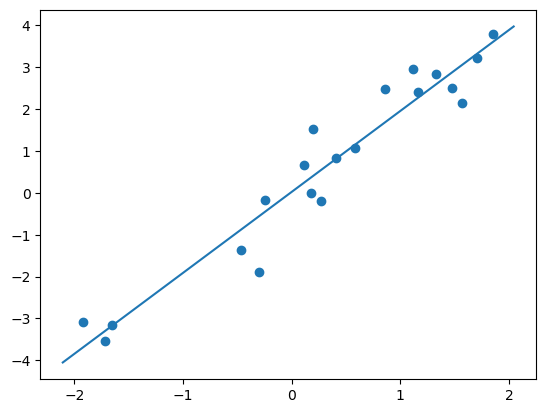

In [11]:
plt.scatter(df["x"], df["y"])
abline(slope = vecb["B1"], intercept=vecb["B0"])

In [10]:
print("Analytical Solution:")
print(f"the intercept (b0): {b0}")
print(f"the coefficent (b1): {b1}")
print("______________________________")
print("Numerical Solution:")
print(f"B0: {vecb["B0"]}\nB1: {vecb["B1"]}")
print(f"error: {error}")
print("______________________________")
print(f"Difference between B0 for analytical and numerical: {b0-vecb["B0"]}\nDifference between B1 for analytical and numerical: {b1-vecb["B1"]}")
print("______________________________")
print("Therefore, I can conclude I get similar estimates for of the coefficent\nand intercept using both the analytical and numerical solution.")


Analytical Solution:
the intercept (b0): 0.024525025871305006
the coefficent (b1): 1.9340058850010584
______________________________
Numerical Solution:
B0: 0.02509554416455422
B1: 1.9336524140879394
error: 6.939136607314112
______________________________
Difference between B0 for analytical and numerical: -0.0005705182932492121
Difference between B1 for analytical and numerical: 0.0003534709131189917
______________________________
Therefore, I can conclude I get similar estimates for of the coefficent
and intercept using both the analytical and numerical solution.
